# Twitter

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re

import folium
from folium import Choropleth

from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings 
warnings.filterwarnings("ignore")

In [2]:
import spacy
from spacy.language import Language
from spacy_langdetect import LanguageDetector

In [3]:
# load the data prepared on file 2.1._Tweeter_map.ipynb
df_hash = pd.read_pickle('data/df_hash.pkl')

In [4]:
# loading of data generated in a file 2.2._Tweeter_map.ipynb
Na_df = pd.read_pickle('data/Na_df.pkl')
America_df = pd.read_pickle('data/America_df.pkl')
Europe_df = pd.read_pickle('data/Europe_df.pkl')
Asia_df = pd.read_pickle('data/Asia_df.pkl')
USA_df = pd.read_pickle('data/USA_df.pkl')

### Language detection

In [5]:
sp = spacy.load('en_core_web_sm')

In [6]:
def get_lang_detector(nlp, name):
    return LanguageDetector()

In [7]:
Language.factory("language_detector", func=get_lang_detector)
sp.add_pipe('language_detector', last=True)

In [8]:
def detect_lang(text_content):
    doc = sp(text_content) 
    detect_language = doc._.language 
    return detect_language['language'], detect_language['score']

In [9]:
# the language of tweets in USA
USA_df.shape

(394166, 26)

In [10]:
# calculating is long
# %%time
# lang_USA = USA_df.sample(n=40000).copy()
# lang_USA['language'], lang_USA['lang_score'] = zip(*[ detect_lang(x) for x in lang_USA.tweet ])

In [11]:
# lang_USA.to_pickle('data/languageinUSA.pkl')

In [12]:
lang_USA = pd.read_pickle('data/languageinUSA.pkl')

In [13]:
# the language of tweets in Europe
Europe_df.shape

(207292, 26)

In [14]:
# calculating is long
# %%time
# lang_Europe = Europe_df.sample(n=21000).copy()
# lang_Europe['language'], lang_Europe['lang_score'] = zip(*[ detect_lang(x) for x in lang_Europe.tweet ])

In [15]:
# lang_Europe.to_pickle('data/languageinEurope.pkl')
lang_Europe = pd.read_pickle('data/languageinEurope.pkl')

In [16]:
# the language of tweets in Asia
Asia_df.shape

(86243, 26)

In [17]:
# calculating is long
# %%time
# lang_Asia = Asia_df.sample(n=16400).copy()
# lang_Asia['language'], lang_Asia['lang_score'] = zip(*[ detect_lang(x) for x in lang_Asia.tweet ])

In [18]:
# lang_Asia.to_pickle('data/languageinAsia.pkl')
lang_Asia = pd.read_pickle('data/languageinAsia.pkl')

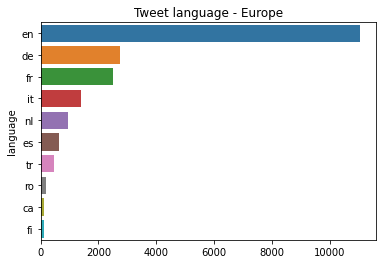

In [19]:
# the language of tweets in Europe
lang_E = lang_Europe.groupby(by='language')['tweet'].count().sort_values(ascending=False)
yE_l = lang_E[:10].index
xE_l = lang_E[:10].values
plt.title('Tweet language - Europe')
sns.barplot(x=xE_l,y=yE_l);

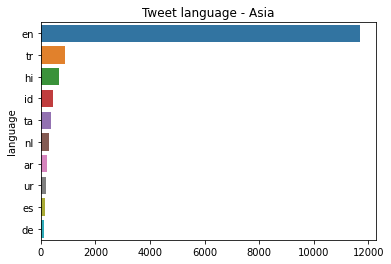

In [20]:
# the language of tweets in Asia
lang_A = lang_Asia.groupby(by='language')['tweet'].count().sort_values(ascending=False)
yA_l = lang_A[:10].index
xA_l = lang_A[:10].values
plt.title('Tweet language - Asia')
sns.barplot(x=xA_l,y=yA_l);

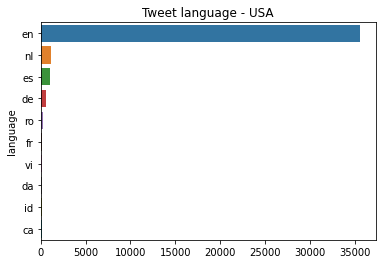

In [21]:
# the language of tweets in USA
lang_U = lang_USA.groupby(by='language')['tweet'].count().sort_values(ascending=False)
yU_l = lang_U[:10].index
xU_l = lang_U[:10].values
plt.title('Tweet language - USA')
sns.barplot(x=xU_l,y=yU_l);

In [22]:
# the language of tweets in unknown place

In [23]:
# %%time
# lang_NA = Na_df.sample(n=95_000).copy()
# lang_NA['language'], lang_NA['lang_score'] = zip(*[ detect_lang(x) for x in lang_NA.tweet ])

In [24]:
# lang_NA.to_pickle('data/languageNA.pkl')
lang_NA = pd.read_pickle('data/languageNA.pkl')

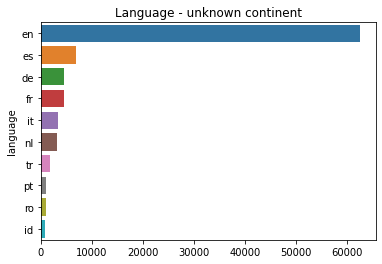

In [25]:
# the language of tweets in unknown place
lang_NA_na = lang_NA.groupby(by='language')['tweet'].count().sort_values(ascending=False)
yNA = lang_NA_na[:10].index
xNA = lang_NA_na[:10].values
plt.title('Language - unknown continent')
sns.barplot(x=xNA,y=yNA);

## Use of tweeting tools

In [26]:
# Use of tweeting tools
Na_df.source.nunique()

639

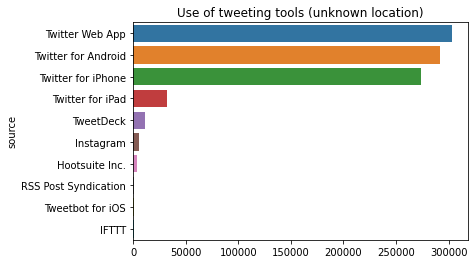

In [27]:
source_tweet = Na_df.groupby(by='source')['tweet'].count().sort_values(ascending=False)
yST = source_tweet[:10].index
xST = source_tweet[:10].values
plt.title('Use of tweeting tools (unknown location)')
sns.barplot(x=xST,y=yST);

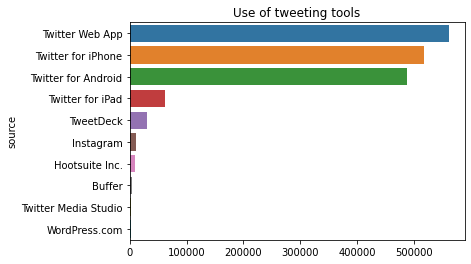

In [28]:
source_tweet_All = df_hash.groupby(by='source')['tweet'].count().sort_values(ascending=False)
ySTA = source_tweet_All[:10].index
xSTA = source_tweet_All[:10].values
plt.title('Use of tweeting tools')
sns.barplot(x=xSTA,y=ySTA);

## Sentiment of tweets

### English

In [29]:
# we define the sentiment of tweets written in English
ang_local_NA = lang_NA[lang_NA.language=='en'].reset_index()
ang_local_USA = lang_USA[lang_USA.language=='en'].reset_index()
ang_local_Europe = lang_Europe[lang_Europe.language=='en'].reset_index()
ang_local_Asia = lang_Asia[lang_Asia.language=='en'].reset_index()

In [30]:
ang_local_NA.drop('index', inplace=True,axis=1)
ang_local_USA.drop('index', inplace=True,axis=1)
ang_local_Europe.drop('index', inplace=True,axis=1)
ang_local_Asia.drop('index', inplace=True,axis=1)

In [31]:
ang_local_NA.shape

(62433, 28)

In [32]:
ang_local_USA.shape

(35509, 28)

In [33]:
ang_local_Europe.shape

(11036, 28)

In [34]:
ang_local_Asia.shape

(11675, 28)

In [35]:
def getSubjectivity(tweet):
    '''This function defines the sentiment of the text'''
    try:
        return TextBlob(tweet).sentiment.subjectivity
    except:
        return None

def getPolarity(tweet):
    '''This function defines the polarity of the text'''
    try:
        return  TextBlob(tweet).sentiment.polarity
    except:
        return None

def sentiment_calc(tweet):
    '''This function is calculating the sentiment of the text'''
    try:
        return TextBlob(tweet).sentiment
    except:
        return None

def getAnalysis(score):
    '''This function defines the sentiment of the text'''
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [36]:
def clean_tweets(tweet):
    '''This feature clears tweets from unnecessary characters'''
    tweet = re.sub(r':', '', str(tweet))
    tweet = re.sub(r'‚Ä¶', '', str(tweet))
    tweet = re.sub('@[A-Za-z0–9]+', '', str(tweet))               
    tweet = re.sub('#', '', str(tweet)) # Removing '#' hash tag
    tweet = re.sub('https?:\/\/\S+', '', str(tweet)) # Removing hyperlink
    #replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ',str(tweet))
    tweet = str(tweet).lower()
    tweet = re.sub('\[.*?\]', '', tweet)
    tweet = re.sub('https?://\S+|www\.\S+', '', tweet)
    tweet = re.sub('<.*?>+', '', tweet)
    tweet = re.sub('\n', '', tweet)
    tweet = re.sub('\w*\d\w*', '', tweet)
    tweet = re.sub(r'#','',tweet)
    tweet = re.sub(r'RT[\s]+','',tweet)
    tweet = re.sub(r'[^\w]', ' ', tweet)
    tweet = re.sub('https', '', tweet)
    tweet = re.sub('https ', '', tweet)
    tweet = re.sub('co', '', tweet)
    return tweet

In [37]:
# clear tweets
# %%time
ang_local_NA['edited_tweet'] = ang_local_NA['tweet'].apply(clean_tweets)
ang_local_NA['subjectivity'] = ang_local_NA['edited_tweet'].apply(getSubjectivity)
ang_local_NA['polarity'] = ang_local_NA['edited_tweet'].apply(getPolarity)
ang_local_NA['sentiment'] = ang_local_NA['edited_tweet'].apply(sentiment_calc)

In [38]:
# %%time
ang_local_Asia['edited_tweet'] = ang_local_Asia['tweet'].apply(clean_tweets)
ang_local_Asia['subjectivity'] = ang_local_Asia['edited_tweet'].apply(getSubjectivity)
ang_local_Asia['polarity'] = ang_local_Asia['edited_tweet'].apply(getPolarity)
ang_local_Asia['sentiment'] = ang_local_Asia['edited_tweet'].apply(sentiment_calc)

In [39]:
# %%time
ang_local_Europe['edited_tweet'] = ang_local_Europe['tweet'].apply(clean_tweets)
ang_local_Europe['subjectivity'] = ang_local_Europe['edited_tweet'].apply(getSubjectivity)
ang_local_Europe['polarity'] = ang_local_Europe['edited_tweet'].apply(getPolarity)
ang_local_Europe['sentiment'] = ang_local_Europe['edited_tweet'].apply(sentiment_calc)

In [40]:
# %%time
ang_local_USA['edited_tweet'] = ang_local_USA['tweet'].apply(clean_tweets)
ang_local_USA['subjectivity'] = ang_local_USA['edited_tweet'].apply(getSubjectivity)
ang_local_USA['polarity'] = ang_local_USA['edited_tweet'].apply(getPolarity)
ang_local_USA['sentiment'] = ang_local_USA['edited_tweet'].apply(sentiment_calc)

In [41]:
ang_local_NA['analysis'] = ang_local_NA['polarity'].apply(getAnalysis)
ang_local_USA['analysis'] = ang_local_USA['polarity'].apply(getAnalysis)
ang_local_Europe['analysis'] = ang_local_Europe['polarity'].apply(getAnalysis)
ang_local_Asia['analysis'] = ang_local_Asia['polarity'].apply(getAnalysis)

In [42]:
ang_local_USA.groupby('hash')['hash'].count()

hash
donaldtrump    19968
joebiden       15541
Name: hash, dtype: int64

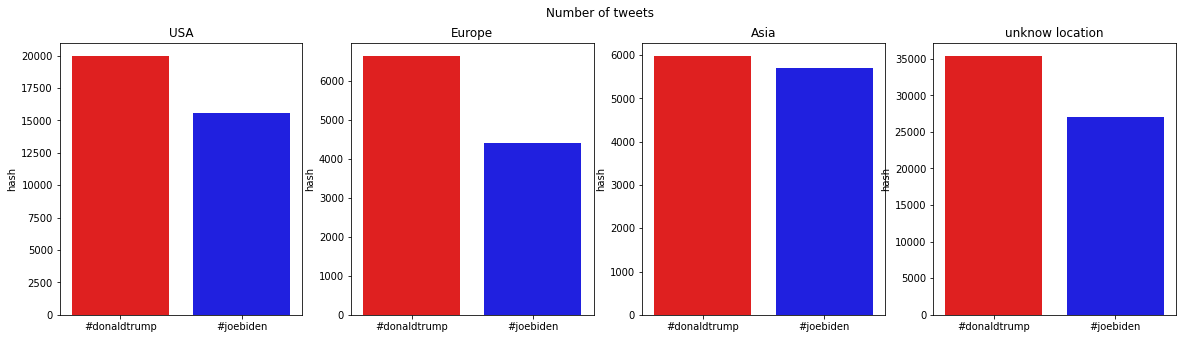

In [43]:
# the number of all tweets
x = ['#donaldtrump','#joebiden']
fig, axes = plt.subplots(1, 4, sharex=True, figsize=(20,5))
fig.suptitle('Number of tweets')
sns.barplot(ax=axes[0], x=x, y=ang_local_USA.groupby('hash')['hash'].count(),palette=['red','blue'])
axes[0].set_title('USA')
sns.barplot(ax=axes[1], x=x, y=ang_local_Europe.groupby('hash')['hash'].count(),palette=['red','blue'])
axes[1].set_title('Europe')
sns.barplot(ax=axes[2], x=x, y=ang_local_Asia.groupby('hash')['hash'].count(),palette=['red','blue'])
axes[2].set_title('Asia')
sns.barplot(ax=axes[3], x=x, y=ang_local_NA.groupby('hash')['hash'].count(),palette=['red','blue'])
axes[3].set_title('unknow location');

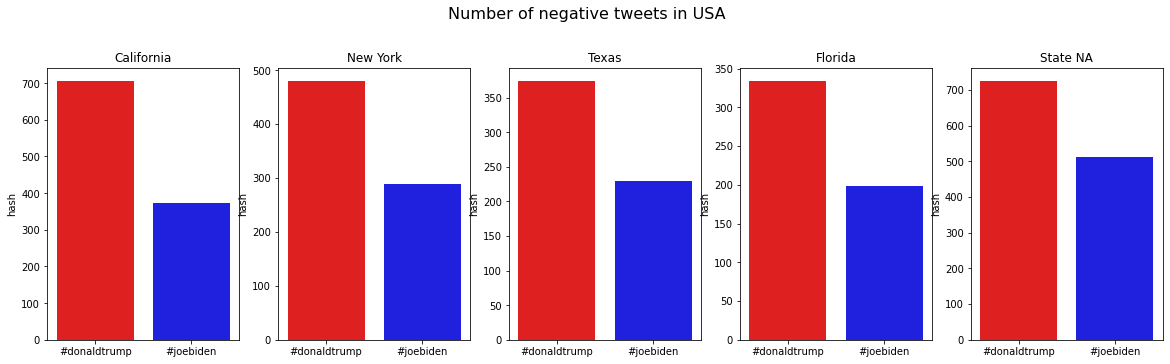

In [44]:
# Number of negative tweets in USA
x = ['#donaldtrump','#joebiden']
fig, axes = plt.subplots(1, 5, sharex=True, figsize=(20,5))
fig.suptitle('Number of negative tweets in USA',fontsize=16, y=1.05)
sns.barplot(ax=axes[0], x=x, y=ang_local_USA[(ang_local_USA.state=='California')&(ang_local_USA.analysis=='Negative')].groupby('hash')['hash'].count(),palette=['red','blue'])
axes[0].set_title('California')
sns.barplot(ax=axes[1], x=x, y=ang_local_USA[(ang_local_USA.state=='New York')&(ang_local_USA.analysis=='Negative')].groupby('hash')['hash'].count(),palette=['red','blue'])
axes[1].set_title('New York')
sns.barplot(ax=axes[2], x=x, y=ang_local_USA[(ang_local_USA.state=='Texas')&(ang_local_USA.analysis=='Negative')].groupby('hash')['hash'].count(),palette=['red','blue'])
axes[2].set_title('Texas')
sns.barplot(ax=axes[3], x=x, y=ang_local_USA[(ang_local_USA.state=='Florida')&(ang_local_USA.analysis=='Negative')].groupby('hash')['hash'].count(),palette=['red','blue'])
axes[3].set_title('Florida')
sns.barplot(ax=axes[4], x=x, y=ang_local_USA[(ang_local_USA.state=='State_NA')&(ang_local_USA.analysis=='Negative')].groupby('hash')['hash'].count(),palette=['red','blue'])
axes[4].set_title('State NA');

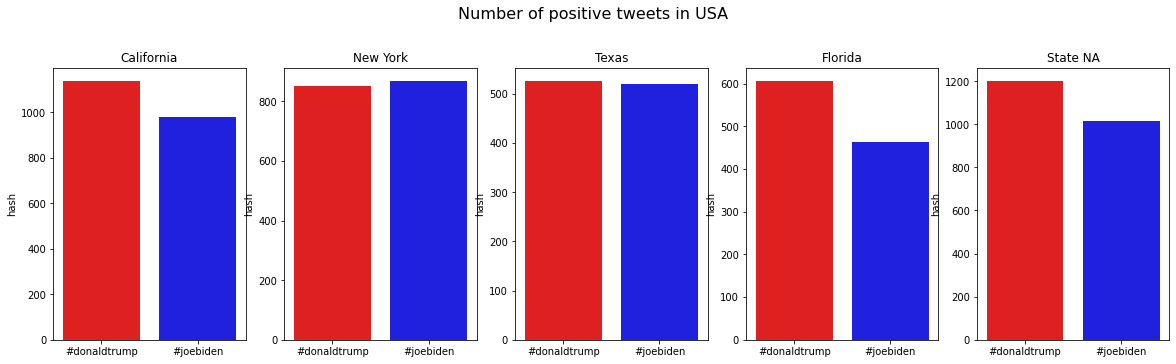

In [45]:
# Number of positive tweets in USA
x = ['#donaldtrump','#joebiden']
fig, axes = plt.subplots(1, 5, sharex=True, figsize=(20,5))
fig.suptitle('Number of positive tweets in USA',fontsize=16, y=1.05)
sns.barplot(ax=axes[0], x=x, y=ang_local_USA[(ang_local_USA.state=='California')&(ang_local_USA.analysis=='Positive')].groupby('hash')['hash'].count(),palette=['red','blue'])
axes[0].set_title('California')
sns.barplot(ax=axes[1], x=x, y=ang_local_USA[(ang_local_USA.state=='New York')&(ang_local_USA.analysis=='Positive')].groupby('hash')['hash'].count(),palette=['red','blue'])
axes[1].set_title('New York')
sns.barplot(ax=axes[2], x=x, y=ang_local_USA[(ang_local_USA.state=='Texas')&(ang_local_USA.analysis=='Positive')].groupby('hash')['hash'].count(),palette=['red','blue'])
axes[2].set_title('Texas')
sns.barplot(ax=axes[3], x=x, y=ang_local_USA[(ang_local_USA.state=='Florida')&(ang_local_USA.analysis=='Positive')].groupby('hash')['hash'].count(),palette=['red','blue'])
axes[3].set_title('Florida')
sns.barplot(ax=axes[4], x=x, y=ang_local_USA[(ang_local_USA.state=='State_NA')&(ang_local_USA.analysis=='Positive')].groupby('hash')['hash'].count(),palette=['red','blue'])
axes[4].set_title('State NA');

## Sentiment

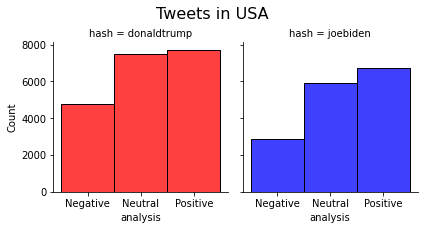

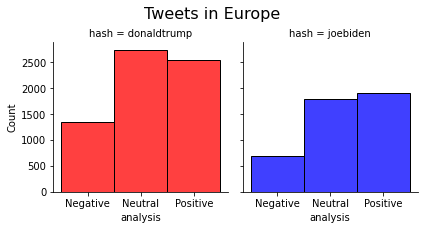

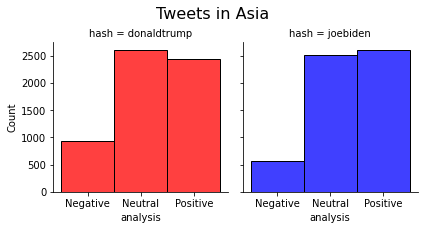

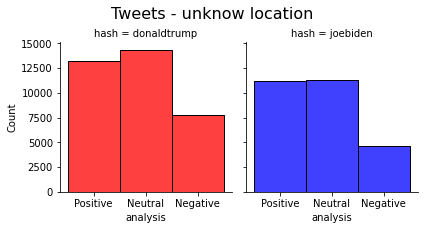

In [46]:
# The Sentiment of tweets in specific locations
g = sns.FacetGrid(ang_local_USA, col="hash", hue='hash',palette=['red','blue'])
g.map(sns.histplot, "analysis")
g.fig.suptitle('Tweets in USA',fontsize=16, y=1.05);

g2 = sns.FacetGrid(ang_local_Europe, col="hash", hue='hash',palette=['red','blue'])
g2.map(sns.histplot, "analysis")
g2.fig.suptitle('Tweets in Europe',fontsize=16, y=1.05);

g3 = sns.FacetGrid(ang_local_Asia, col="hash",col_order=['donaldtrump','joebiden'], hue='hash',palette=['blue','red'])
g3.map(sns.histplot, "analysis")
g3.fig.suptitle('Tweets in Asia',fontsize=16, y=1.05);

g4 = sns.FacetGrid(ang_local_NA, col="hash",col_order=['donaldtrump','joebiden'], hue='hash',palette=['blue','red'])
g4.map(sns.histplot, "analysis")
g4.fig.suptitle('Tweets - unknow location',fontsize=16, y=1.05);

In [47]:
# preparing map of tweets
poly = gpd.read_file('data/usa_shape/tl_2014_us_state.shp', SHAPE_RESTORE_SHX='YES')
geo_data=poly[['NAME','geometry']].set_index('NAME').__geo_interface__

In [48]:
USA_s = USA_df.groupby(by = 'state')['tweet'].count().sort_values(ascending = False)

In [49]:
# map with tweets
# most_tweet = folium.Map(location = [35.32,-81.0589], tiles='cartodbpositron', zoom_start = 3)
# Choropleth(geo_data = poly[['NAME', 'geometry']].set_index('NAME').__geo_interface__, 
#            data = USA_s,
#            bins = 9,
#            key_on = "feature.id", 
#            fill_color = 'YlGnBu', 
#            legend_name = 'Number of tweets'
#           ).add_to(most_tweet)
# most_tweet

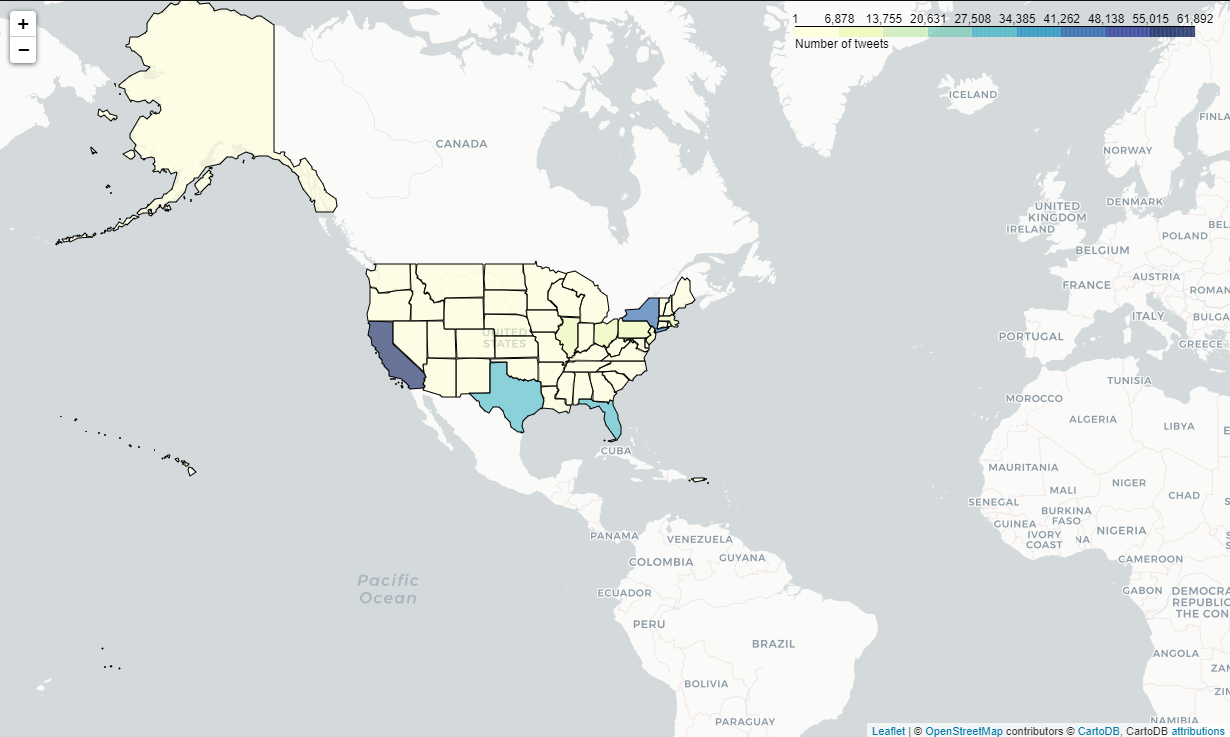

In [50]:
# the map generates a large file, so I will load the prepared file
from IPython.display import Image
Image('graph/USA_most_tweets.png')

In [51]:
def sentiment(x):
    '''The Function is calculating sentiment for each state of USA'''
    df = x.value_counts()
    try:
        return (df[3]*100)/ df.sum()
    except:
        return np.nan

In [52]:
usa_states = ang_local_USA.groupby(['state','hash']).agg({'sentiment':sentiment})

In [53]:
usa_results = pd.DataFrame(index = usa_states.index.get_level_values(0).unique(), columns=['NAME'])

In [54]:
for data in usa_results.index:
    try:
        if usa_states.loc[[(data,'donaldtrump')]].values > usa_states.loc[[(data,'joebiden')]].values:
            usa_results.loc[data,'NAME'] = 1 #donald Trump
        else:
            usa_results.loc[data,'NAME'] = 2 #joe Biden
    except:
        continue

In [55]:
usa_results.dropna(inplace=True)

In [56]:
# preparing map for states USA
import json
geo_json = json.load(open('data/usa_shape/us-states.json'))
def my_color_function(ID):
    try:
        if usa_results.loc[ID['id'],'NAME'] == 1:
            return '#a70000' # color red for Donald Trump
        else:
            return '#0013fc' # color blue for Joe Biden
    except:
        pass

In [57]:
# sentiment for candidates
# map_tweet_candidate = folium.Map([43, -100], tiles = 'cartodbpositron', zoom_start = 4)

# folium.GeoJson(
#     geo_data,
#     style_function = lambda feature: {
#         'fillColor': my_color_function(feature),
#         'color' : 'black',
#         'weight' : 1
#         }
#     ).add_to(map_tweet_candidate)
# map_tweet_candidate

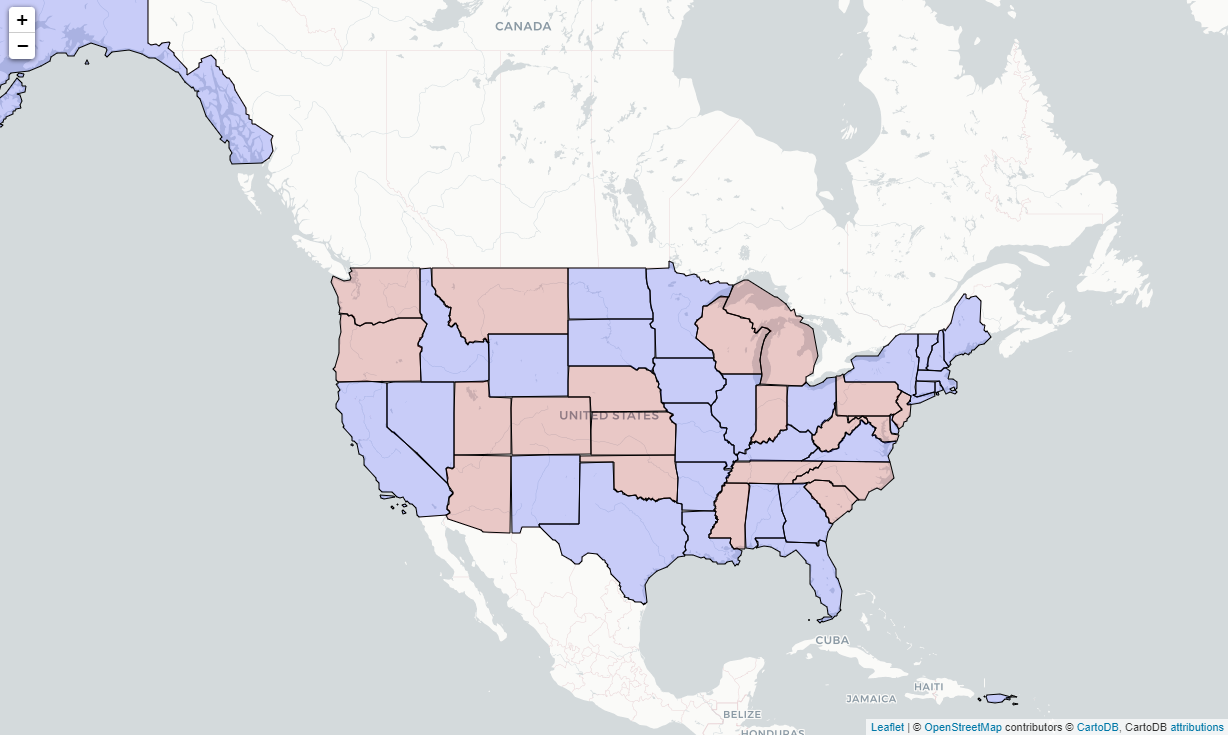

In [58]:
# the map generates a large file, so I will load the prepared file
from IPython.display import Image
Image('graph/USA_sentiment.png')

## Tweeter users

### Have most followers

In [59]:
df_hash.user_followers_count.dropna(inplace=True)
df_hash.retweet_count.dropna(inplace=True)
df_hash.likes.dropna(inplace=True)

In [60]:
df_hash.user_followers_count = pd.to_numeric(df_hash.user_followers_count)
df_hash.retweet_count = pd.to_numeric(df_hash.retweet_count)
df_hash.likes = pd.to_numeric(df_hash.likes)

In [61]:
have_most_cont_NA = df_hash[df_hash.continent=='Continent_NA']
have_most_cont_USA = df_hash[df_hash.country=='United States']
have_most_cont_Europe = df_hash[df_hash.continent=='Europe']
have_most_cont_Asia = df_hash[df_hash.continent=='Asia']

In [62]:
# NA Continent
have_most_cont_NA[['user_screen_name', 'user_description', 'user_followers_count', 'continent']].groupby('user_screen_name').agg({'user_followers_count':'max'}).sort_values(by='user_followers_count',ascending=False)[:10]

,user_followers_count
user_screen_name,
ladygaga,82417099.0
AlejandroSanz,19793224.0
CNNEE,19157629.0
Metro_TV,10587949.0
billboard,9863236.0
CarlosLoret,8542945.0
brozoxmiswebs,6548409.0
YourAnonCentral,6047302.0
El_Universal_Mx,5770502.0


In [63]:
# USA
have_most_cont_USA[['user_screen_name', 'user_description', 'user_followers_count', 'continent']].groupby('user_screen_name').agg({'user_followers_count':'max'}).sort_values(by='user_followers_count',ascending=False)[:10]

,user_followers_count
user_screen_name,
PerezHilton,5750841.0
common,5477365.0
danawhite,5476752.0
WORLDSTAR,5258686.0
USATODAY,4163175.0
Alyssa_Milano,3750110.0
THR,3264802.0
Telemundo,2966787.0
carlaangola,2677033.0


In [64]:
# Europe Continent
have_most_cont_Europe[['user_screen_name', 'user_description', 'user_followers_count', 'continent']].groupby('user_screen_name').agg({'user_followers_count':'max'}).sort_values(by='user_followers_count',ascending=False)[:10]

,user_followers_count
user_screen_name,
muyinteresante,8398408.0
Haberturk,4403620.0
bbcmundo,4155516.0
France24_fr,3569533.0
afpfr,3557332.0
Independent,3412468.0
Le_Figaro,3328361.0
libe,3156987.0
repubblica,3050682.0


In [65]:
# Asia Continent
have_most_cont_Asia[['user_screen_name', 'user_description', 'user_followers_count', 'continent']].groupby('user_screen_name').agg({'user_followers_count':'max'}).sort_values(by='user_followers_count',ascending=False)[:10]

,user_followers_count
user_screen_name,
detikcom,16297133.0
ndtv,13940930.0
CGTNOfficial,13783747.0
timesofindia,13216354.0
cnnarabic,12034151.0
aajtak,11351589.0
ABPNews,10563327.0
tvOneNews,8882196.0
kompascom,7863661.0


### Have most tweet

In [66]:
have_most_cont_NA.value_counts(subset=['user_screen_name'])[:10]

user_screen_name
greeneyes3470       1410
robinsnewswire      1325
yyoo11122           1027
CupofJoeintheD2      995
ElectionRobot        954
TrentU23947054       870
2020Vision6          866
TweetyThings1        847
LiuBaoBei1           784
Kegan05              758
dtype: int64

In [67]:
have_most_cont_USA.value_counts(subset=['user_screen_name'])[:10]

user_screen_name
Hotpage_News        1843
steveziegenbus2     1259
JournalistJG        1082
mcleod               980
THCPetDoctor         913
lookforsun           862
Starbright489        851
KDWebster4           807
BrianAnthonyBo1      715
POTUSNetwork         709
dtype: int64

In [68]:
have_most_cont_Europe.value_counts(subset=['user_screen_name'])[:10]

user_screen_name
revue2presse        2515
Gjallarhornet        719
PeteTruthUSA         521
zazoomblog           512
C_W_UK               510
ormiga               502
CorentinSellin       457
realphannigan        450
GlobalNewsXL         439
RupertaMargate       426
dtype: int64

In [69]:
have_most_cont_Asia.value_counts(subset=['user_screen_name'])[:10]

user_screen_name
kk131066            815
TV9Bharatvarsh      676
FarahGhuznavi       532
thatsTamil          505
ActivistBowen2      467
ABPNews             377
moneycontrolcom     349
thatsMalayalam      321
WIONews             315
IndiaToday          314
dtype: int64

### Have most retweet

In [70]:
have_most_cont_NA[['user_screen_name', 'retweet_count','country']].groupby('user_screen_name').agg({'retweet_count':'sum','country':'max'}).sort_values(by='retweet_count',ascending=False)[:10]

,retweet_count,country
user_screen_name,,
RealJamesWoods,159177.0,Country_NA
ladygaga,30210.0,Country_NA
LPLdirect,18755.0,Country_NA
SAHINOP,17893.0,Country_NA
GordonGChang,15401.0,Country_NA
realTrumpForce,14299.0,Country_NA
Skillsetmag,12181.0,Country_NA
Jeff_Paul,12023.0,Country_NA
LVNancy,10078.0,Country_NA


In [71]:
have_most_cont_USA[['user_screen_name', 'retweet_count','country']].groupby('user_screen_name').agg({'retweet_count':'sum','country':'max'}).sort_values(by='retweet_count',ascending=False)[:10]

,retweet_count,country
user_screen_name,,
BetteMidler,78401.0,United States
w_terrence,56786.0,United States
JudicialWatch,56134.0,United States
SaraCarterDC,42851.0,United States
JohnHPiette,41106.0,United States
DebraMessing,29751.0,United States
AndyOstroy,24058.0,United States
EpochTimes,23937.0,United States
Laurie_Garrett,18032.0,United States


In [72]:
have_most_cont_Europe[['user_screen_name', 'retweet_count','country']].groupby('user_screen_name').agg({'retweet_count':'sum','country':'max'}).sort_values(by='retweet_count',ascending=False)[:10]

,retweet_count,country
user_screen_name,,
Mediavenir,77932.0,France
BeNosey,15648.0,United Kingdom
joelycett,12574.0,United Kingdom
CorentinSellin,9813.0,France
brunolp30,9255.0,France
dw_espanol,7757.0,Germany
andrebercoff,6656.0,France
you_trend,6328.0,Italy
maxotte_says,6107.0,Germany


In [73]:
have_most_cont_Asia[['user_screen_name', 'retweet_count','country']].groupby('user_screen_name').agg({'retweet_count':'sum','country':'max'}).sort_values(by='retweet_count',ascending=False)[:10]

,retweet_count,country
user_screen_name,,
AOECOIN,8363.0,Cambodia
DChaurasia2312,3919.0,India
ShyamRangeela,3789.0,India
rameshlaus,2595.0,India
PressTV,2525.0,Iran
kk131066,2491.0,Malaysia
ABPNews,2436.0,India
ANI,2372.0,India
i24NEWS_FR,2314.0,Israel


### Have most likes

In [74]:
have_most_cont_NA[['user_screen_name','likes','country']].groupby('user_screen_name').agg({'likes':'sum','country':'max'}).sort_values(by='likes',ascending=False)[:10]

,likes,country
user_screen_name,,
RealJamesWoods,409923.0,Country_NA
ladygaga,309236.0,Country_NA
derekjames150,72199.0,Country_NA
LPLdirect,59159.0,Country_NA
peterdaou,58027.0,Country_NA
candundaradasi,52375.0,Country_NA
realTrumpForce,42684.0,Country_NA
GordonGChang,33403.0,Country_NA
Jeff_Paul,33212.0,Country_NA


In [75]:
have_most_cont_USA[['user_screen_name','likes','country']].groupby('user_screen_name').agg({'likes':'sum','country':'max'}).sort_values(by='likes',ascending=False)[:10]

,likes,country
user_screen_name,,
BetteMidler,627435.0,United States
w_terrence,275763.0,United States
SaraCarterDC,181059.0,United States
AndyOstroy,164452.0,United States
JohnHPiette,148612.0,United States
JudicialWatch,145321.0,United States
JohnKingCNN,134347.0,United States
DebraMessing,129407.0,United States
howardfineman,86959.0,United States


In [76]:
have_most_cont_Europe[['user_screen_name','likes','country']].groupby('user_screen_name').agg({'likes':'sum','country':'max'}).sort_values(by='likes',ascending=False)[:10]

,likes,country
user_screen_name,,
Mediavenir,744994.0,France
BeNosey,67789.0,United Kingdom
you_trend,40244.0,Italy
CorentinSellin,31956.0,France
heuteshow,30284.0,Germany
maxotte_says,28770.0,Germany
dw_espanol,24907.0,Germany
France24_fr,24644.0,France
andrebercoff,20817.0,France


In [77]:
have_most_cont_Asia[['user_screen_name','likes','country']].groupby('user_screen_name').agg({'likes':'sum','country':'max'}).sort_values(by='likes',ascending=False)[:10]

,likes,country
user_screen_name,,
rameshlaus,68180.0,India
aajtak,65071.0,India
ABPNews,58358.0,India
DChaurasia2312,47536.0,India
ANI,39573.0,India
ndtv,25648.0,India
ShyamRangeela,23335.0,India
sri50,22855.0,India
polimernews,21538.0,India


## Worldcloud

In [78]:
sp = spacy.load('en_core_web_sm')

In [79]:
spacy_sw = sp.Defaults.stop_words # Spacy: 326

In [80]:
from nltk.corpus import stopwords
nltk_sw = stopwords.words('english') #NLTK: 179

In [81]:
#len(list(STOPWORDS)) # wordcloud STOPWORDS: 192

In [82]:
stop_words = list(spacy_sw) + list(nltk_sw) + list(STOPWORDS)

In [83]:
len(stop_words)

697

In [84]:
stop_words = list(dict.fromkeys(stop_words))

In [85]:
def word_cloud(wd_list,title='',bg='white'):
    '''This function create Wordcloud'''
    stopwords = stop_words
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color=bg,
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");

In [86]:
neg_USA = ang_local_USA.edited_tweet[ang_local_USA.analysis=='Negative']
neg_NA = ang_local_NA.edited_tweet[ang_local_NA.analysis=='Negative']
neg_Europe = ang_local_Europe.edited_tweet[ang_local_Europe.analysis=='Negative']
neg_Asia = ang_local_Asia.edited_tweet[ang_local_Asia.analysis=='Negative']

In [87]:
pos_USA = ang_local_USA.edited_tweet[ang_local_USA.analysis=='Positive']
pos_NA = ang_local_NA.edited_tweet[ang_local_NA.analysis=='Positive']
pos_Europe = ang_local_Europe.edited_tweet[ang_local_Europe.analysis=='Positive']
pos_Asia = ang_local_Asia.edited_tweet[ang_local_Asia.analysis=='Positive']

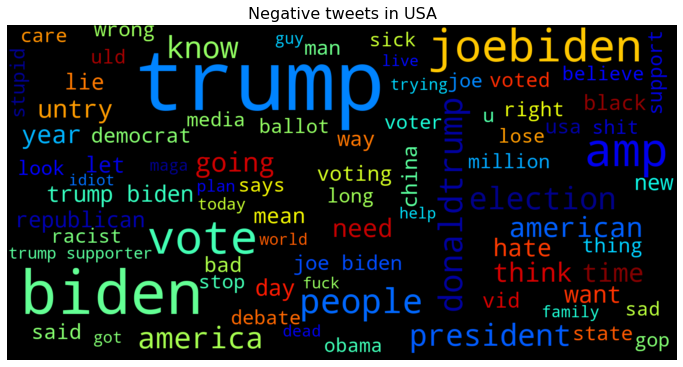

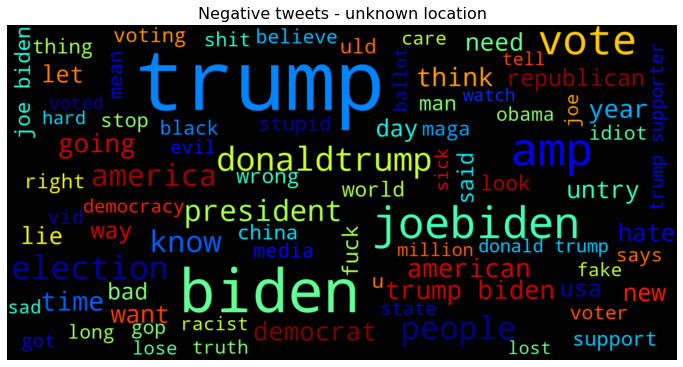

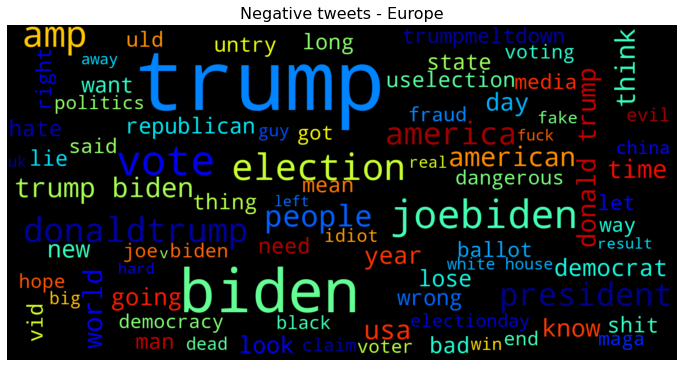

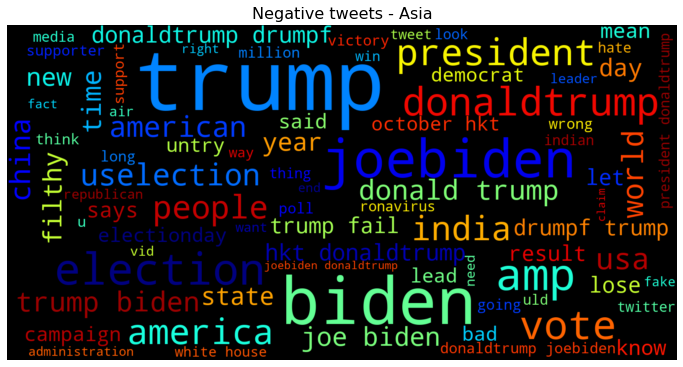

In [88]:
word_cloud(neg_USA, 'Negative tweets in USA','black')
word_cloud(neg_NA, 'Negative tweets - unknown location','black')
word_cloud(neg_Europe, 'Negative tweets - Europe','black')
word_cloud(neg_Asia, 'Negative tweets - Asia','black')

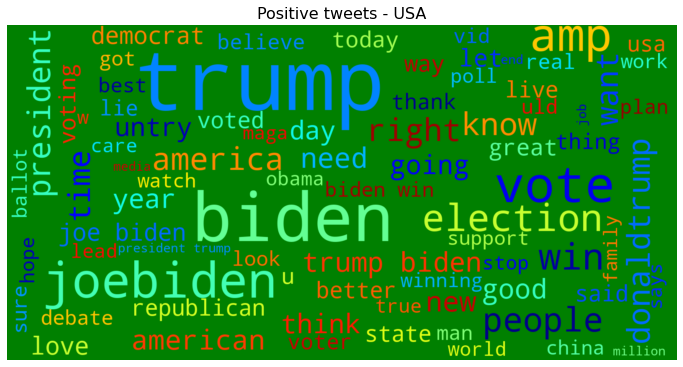

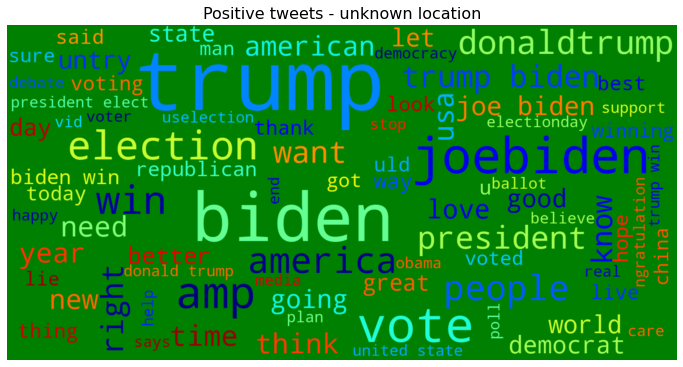

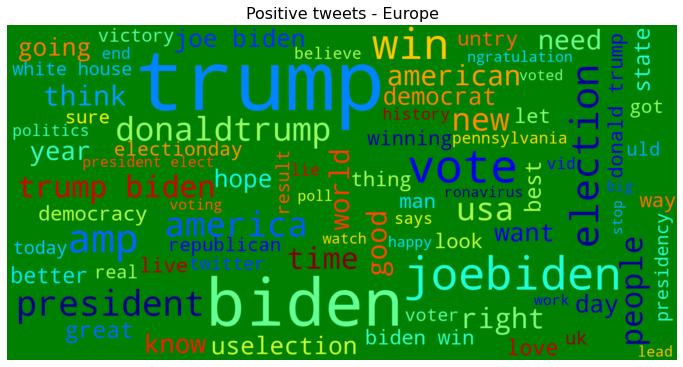

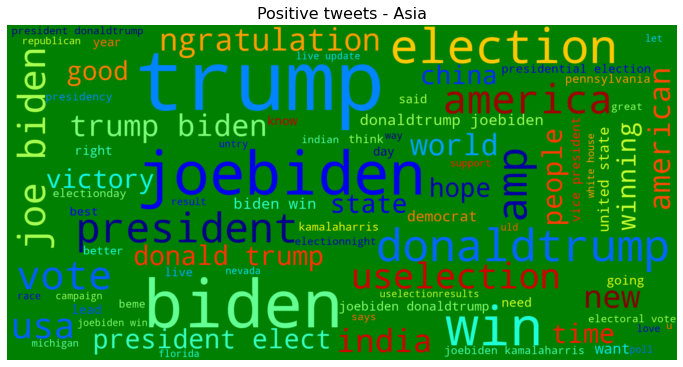

In [89]:
word_cloud(pos_USA, 'Positive tweets - USA','green')
word_cloud(pos_NA, 'Positive tweets - unknown location','green')
word_cloud(pos_Europe, 'Positive tweets - Europe','green')
word_cloud(pos_Asia, 'Positive tweets - Asia','green')